In [1]:
# read jsons for participant and model data
import json
import numpy as np

participant_file = 'x_participant_data.json'
model_file = 'x_model_data.json'

from math import sqrt
from scipy.stats import norm
def binomial_confidence_interval(successes, trials, confidence_level=0.95):
    p = successes / trials
    z = norm.ppf((1 + confidence_level) / 2)

    interval = z * sqrt((p * (1 - p)) / trials)
    return interval

with open(participant_file) as f:
    participant_data = json.load(f)
with open(model_file) as f:
    model_data = json.load(f)

In [2]:
print(participant_data.keys())

dict_keys(['safety_expected/belief_a_surprised_0', 'safety_expected/belief_b_surprised_1', 'safety_expected/outcome_relieved_1', 'goal_control/outcome_joyful_1', 'goal_control/belief_b_grateful_1', 'goal_control/emotion_grateful_0', 'goal_control/outcome_grateful_1', 'safety_expected/outcome_surprised_1', 'safety_expected/emotion_surprised_0', 'goal_control/emotion_disappointed_0', 'safety_expected/outcome_relieved_0', 'safety_expected/emotion_resigned_0', 'goal_control/outcome_disappointed_0', 'goal_control/belief_b_disappointed_0', 'safety_expected/outcome_surprised_0', 'goal_control/belief_b_joyful_1', 'goal_control/outcome_disappointed_1', 'safety_expected/belief_b_resigned_1', 'safety_expected/outcome_resigned_0', 'goal_control/belief_a_frustrated_0', 'goal_control/belief_a_disappointed_0', 'goal_control/belief_a_grateful_0', 'goal_control/belief_a_joyful_0', 'safety_expected/belief_a_devastated_0', 'safety_expected/belief_a_relieved_0', 'safety_expected/belief_a_resigned_0', 'goa

In [3]:
collapse =  None

In [4]:
def transform_answer(answer, froma, toa):
    if answer.strip().lower() == froma:
        return toa
    else:
        return answer

In [5]:

condition_num_participants = {}
for condition_names in participant_data.keys():
    # count number of participants
    
    for scenario_id in range(10):
        participant_answers = participant_data[condition_names][scenario_id]
        if condition_names not in condition_num_participants:
            condition_num_participants[condition_names] = 0
        condition_num_participants[condition_names] += len(participant_answers)

In [6]:
pp_agreement_scores = {}
mode = 'majority'
hold = True 
# calculate agreement between participants
if collapse == None:
    for condition_names in participant_data.keys():

        if condition_names not in pp_agreement_scores:
            pp_agreement_scores[condition_names] = []

        for scenario_id in range(10):
            participant_answers = participant_data[condition_names][scenario_id]
            participant_answers = [a.strip().lower() for a in participant_answers]

            # calculate agreement with hold-one-out majority vote
            average_hold_one_out = []
            for i in range(len(participant_answers)):
                if hold:
                    hold_one_out = [a for j, a in enumerate(participant_answers) if j != i]
                else:
                    hold_one_out = participant_answers
                # count answers
                answer_counts = {}
                for a in hold_one_out:
                    if a not in answer_counts:
                        answer_counts[a] = 0
                    answer_counts[a] += 1
                # average hold-one-out
                total_ans = len(hold_one_out)
                answer_counts = {k: v / total_ans for k, v in answer_counts.items()}
                # get majority answer
                majority_answer = max(answer_counts, key=answer_counts.get)

                answer = participant_answers[i]
                if mode == "average":
                    if answer not in answer_counts:
                        pp_agreement_scores[condition_names].append(0)
                    else:
                        pp_agreement_scores[condition_names].append(answer_counts[answer])
                elif mode == "majority":
                    pp_agreement_scores[condition_names].append(1 if answer == majority_answer else 0)


In [7]:
# pp_agreement_scores = {}
# mode = 'majority'
# # calculate agreement between participants
# if collapse == None:
#     for condition_names in participant_data.keys():

#         if condition_names not in pp_agreement_scores:
#             pp_agreement_scores[condition_names] = []

#         for scenario_id in range(10):
#             participant_answers = participant_data[condition_names][scenario_id]
#             participant_answers = [a.strip().lower() for a in participant_answers]

#             # calculate agreement with hold-one-out majority vote
#             average_hold_one_out = []
#             for i in range(len(participant_answers)):
#                 hold_one_out = [a for j, a in enumerate(participant_answers)]
#                 # count answers
#                 answer_counts = {}
#                 for a in hold_one_out:
#                     if a not in answer_counts:
#                         answer_counts[a] = 0
#                     answer_counts[a] += 1
#                 # average hold-one-out
#                 total_ans = len(hold_one_out)
#                 answer_counts = {k: v / total_ans for k, v in answer_counts.items()}
#                 # get majority answer
#                 majority_answer = max(answer_counts, key=answer_counts.get)

#                 answer = participant_answers[i]
#                 if mode == "average":
#                     if answer not in answer_counts:
#                         pp_agreement_scores[condition_names].append(0)
#                     else:
#                         pp_agreement_scores[condition_names].append(answer_counts[answer])
#                 elif mode == "majority":
#                     pp_agreement_scores[condition_names].append(1 if answer == majority_answer else 0)


In [8]:
agreement_scores = {}
if collapse == None:
    for model_method in model_data.keys():
        agreement_scores[model_method] = {}
        for condition_names in participant_data.keys():
            if condition_names not in agreement_scores[model_method]:
                agreement_scores[model_method][condition_names] = []
            for scenario_id in range(10):
                participant_answers = participant_data[condition_names][scenario_id]
                participant_answers = [a.strip().lower() for a in participant_answers]

                # calculate agreement with hold-one-out majority vote
                average_hold_one_out = []
                for i in range(len(participant_answers)):
                    hold_one_out = [a for j, a in enumerate(participant_answers) if j != i]
                    if hold:
                        hold_one_out = [a for j, a in enumerate(participant_answers) if j != i]
                    else:
                        hold_one_out = participant_answers
                    # count answers
                    answer_counts = {}
                    for a in hold_one_out:
                        if a not in answer_counts:
                            answer_counts[a] = 0
                        answer_counts[a] += 1
                    # average hold-one-out
                    total_ans = len(hold_one_out)
                    answer_counts = {k: v / total_ans for k, v in answer_counts.items()}
                    # get majority answer
                    majority_answer = max(answer_counts, key=answer_counts.get)

                    model_answer = model_data[model_method][condition_names][scenario_id]
                    model_answer = model_answer.strip().lower()
                    answer = model_answer
                    if mode == "average":
                        if answer not in answer_counts:
                            agreement_scores[model_method][condition_names].append(0)
                        else:
                            agreement_scores[model_method][condition_names].append(answer_counts[answer])
                    elif mode == "majority":
                        agreement_scores[model_method][condition_names].append(1 if answer == majority_answer else 0)


In [9]:
# show agreement by inference method
# calculate agreement by inferences
model_means = {}
model_sems = {}
pp_means = {}
pp_sems = {}
for model_method in agreement_scores.keys():
    emotion_inference_safety_expected = []
    emotion_inference_goal_control = []
    control_inference = []
    goal_inference = []
    safety_inference = []
    expected_inference = []
    outcome_inference_safety_expected = []
    outcome_inference_goal_control = []
    agreements = agreement_scores[model_method]

    model_means[model_method] = {}
    model_sems[model_method] = {}
    for condition in agreements:
        if "safety_expected" in condition and "emotion" in condition:
            emotion_inference_safety_expected += agreements[condition]
        elif "goal_control" in condition and "emotion" in condition:
            emotion_inference_goal_control += agreements[condition]
        elif "goal_control" in condition and "belief_a" in condition:
            control_inference += agreements[condition]
        elif "safety_expected" in condition and "belief_a" in condition:
            expected_inference += agreements[condition]
        elif "goal_control" in condition and "belief_b" in condition:
            goal_inference += agreements[condition]
        elif "safety_expected" in condition and "belief_b" in condition:
            safety_inference += agreements[condition]
        elif "goal_control" in condition and "outcome" in condition:
            outcome_inference_goal_control += agreements[condition]
        elif "safety_expected" in condition and "outcome" in condition:
            outcome_inference_safety_expected += agreements[condition]
    
    model_means[model_method]["emotion_inference_safety_expected"] = np.mean(emotion_inference_safety_expected)
    model_sems[model_method]["emotion_inference_safety_expected"] = binomial_confidence_interval(np.sum(emotion_inference_safety_expected), len(emotion_inference_safety_expected))

    model_means[model_method]["emotion_inference_goal_control"] = np.mean(emotion_inference_goal_control)
    model_sems[model_method]["emotion_inference_goal_control"] = binomial_confidence_interval(np.sum(emotion_inference_goal_control), len(emotion_inference_goal_control))

    model_means[model_method]["control_inference"] = np.mean(control_inference)
    model_sems[model_method]["control_inference"] = binomial_confidence_interval(np.sum(control_inference), len(control_inference))

    model_means[model_method]["expected_inference"] = np.mean(expected_inference)
    model_sems[model_method]["expected_inference"] = binomial_confidence_interval(np.sum(expected_inference), len(expected_inference))

    model_means[model_method]["goal_inference"] = np.mean(goal_inference)
    model_sems[model_method]["goal_inference"] = binomial_confidence_interval(np.sum(goal_inference), len(goal_inference))

    model_means[model_method]["safety_inference"] = np.mean(safety_inference)
    model_sems[model_method]["safety_inference"] = binomial_confidence_interval(np.sum(safety_inference), len(safety_inference))

    model_means[model_method]["outcome_inference_goal_control"] = np.mean(outcome_inference_goal_control)
    model_sems[model_method]["outcome_inference_goal_control"] = binomial_confidence_interval(np.sum(outcome_inference_goal_control), len(outcome_inference_goal_control))

    model_means[model_method]["outcome_inference_safety_expected"] = np.mean(outcome_inference_safety_expected)
    model_sems[model_method]["outcome_inference_safety_expected"] = binomial_confidence_interval(np.sum(outcome_inference_safety_expected), len(outcome_inference_safety_expected))

    print("Agreement by inference", model_method)
    print("Emotion inference safety expected: ", np.mean(emotion_inference_safety_expected),
        binomial_confidence_interval(np.sum(emotion_inference_safety_expected), len(emotion_inference_safety_expected)))
        # 1.96 * np.std(emotion_inference_safety_expected) / np.sqrt(len(emotion_inference_safety_expected)))
    print("Emotion inference goal control: ", np.mean(emotion_inference_goal_control),
        binomial_confidence_interval(np.sum(emotion_inference_goal_control), len(emotion_inference_goal_control)))
            # 1.96 * np.std(emotion_inference_goal_control) / np.sqrt(len(emotion_inference_goal_control)))
    print("Control inference: ", np.mean(control_inference),
        binomial_confidence_interval(np.sum(control_inference), len(control_inference)))
            # 1.96 * np.std(control_inference) / np.sqrt(len(control_inference)))
    print("Expected inference: ", np.mean(expected_inference),
        binomial_confidence_interval(np.sum(expected_inference), len(expected_inference)))
            # 1.96 * np.std(expected_inference) / np.sqrt(len(expected_inference)))
    print("Goal inference: ", np.mean(goal_inference),
        binomial_confidence_interval(np.sum(goal_inference), len(goal_inference)))
            # 1.96 * np.std(goal_inference) / np.sqrt(len(goal_inference)))
    print("Safety inference: ", np.mean(safety_inference),
        binomial_confidence_interval(np.sum(safety_inference), len(safety_inference)))
            # 1.96 * np.std(safety_inference) / np.sqrt(len(safety_inference)))
    print("Outcome inference goal control: ", np.mean(outcome_inference_goal_control),
        binomial_confidence_interval(np.sum(outcome_inference_goal_control), len(outcome_inference_goal_control)))
            # 1.96 * np.std(outcome_inference_goal_control) / np.sqrt(len(outcome_inference_goal_control)))
    print("Outcome inference safety expected: ", np.mean(outcome_inference_safety_expected),
        binomial_confidence_interval(np.sum(outcome_inference_safety_expected), len(outcome_inference_safety_expected)))
            # 1.96 * np.std(outcome_inference_safety_expected) / np.sqrt(len(outcome_inference_safety_expected)))

Agreement by inference gpt-4_0shot
Emotion inference safety expected:  0.7361013370865588 0.022915980829094896
Emotion inference goal control:  0.6528274874731568 0.024964436658373005
Control inference:  0.8362491252624212 0.019186317596010798
Expected inference:  0.6810466760961811 0.024292677871678055
Goal inference:  0.5736434108527132 0.02573145756355082
Safety inference:  0.41251778093883357 0.02573203482177851
Outcome inference goal control:  0.623321554770318 0.02524709000596515
Outcome inference safety expected:  0.8224101479915433 0.019884294936540026
Agreement by inference gpt-4_0shot_cot
Emotion inference safety expected:  0.6235045742434905 0.0251913084797007
Emotion inference goal control:  0.6700071581961345 0.02465709275582081
Control inference:  0.8733379986004198 0.01724433010744821
Expected inference:  0.7517680339462518 0.022516151768222945
Goal inference:  0.6645525017618041 0.024565964536463047
Safety inference:  0.5547652916073968 0.02597793213703005
Outcome infer

In [10]:
# show agreement by inference method
# calculate agreement by inferences
pp_means = {}
pp_sems = {}
emotion_inference_safety_expected = []
emotion_inference_goal_control = []
control_inference = []
goal_inference = []
safety_inference = []
expected_inference = []
outcome_inference_safety_expected = []
outcome_inference_goal_control = []
agreements = pp_agreement_scores
p_nums = {}

model_means["interparticipant"] = {}
model_sems["interparticipant"] = {}
for condition in agreements:
    if "safety_expected" in condition and "emotion" in condition:
        emotion_inference_safety_expected += agreements[condition]
        if "emotion_inference_safety_expected" not in p_nums:
            p_nums["emotion_inference_safety_expected"] = 0
        p_nums["emotion_inference_safety_expected"] += condition_num_participants[condition]
    elif "goal_control" in condition and "emotion" in condition:
        emotion_inference_goal_control += agreements[condition]
        if "emotion_inference_goal_control" not in p_nums:
            p_nums["emotion_inference_goal_control"] = 0
        p_nums["emotion_inference_goal_control"] += condition_num_participants[condition]
    elif "goal_control" in condition and "belief_a" in condition:
        control_inference += agreements[condition]
        if "control_inference" not in p_nums:
            p_nums["control_inference"] = 0
        p_nums["control_inference"] += condition_num_participants[condition]
    elif "safety_expected" in condition and "belief_a" in condition:
        expected_inference += agreements[condition]
        if "expected_inference" not in p_nums:
            p_nums["expected_inference"] = 0
        p_nums["expected_inference"] += condition_num_participants[condition]
    elif "goal_control" in condition and "belief_b" in condition:
        goal_inference += agreements[condition]
        if "goal_inference" not in p_nums:
            p_nums["goal_inference"] = 0
        p_nums["goal_inference"] += condition_num_participants[condition]
    elif "safety_expected" in condition and "belief_b" in condition:
        safety_inference += agreements[condition]
        if "safety_inference" not in p_nums:
            p_nums["safety_inference"] = 0
        p_nums["safety_inference"] += condition_num_participants[condition]
    elif "goal_control" in condition and "outcome" in condition:
        outcome_inference_goal_control += agreements[condition]
        if "outcome_inference_goal_control" not in p_nums:
            p_nums["outcome_inference_goal_control"] = 0
        p_nums["outcome_inference_goal_control"] += condition_num_participants[condition]
    elif "safety_expected" in condition and "outcome" in condition:
        outcome_inference_safety_expected += agreements[condition]
        if "outcome_inference_safety_expected" not in p_nums:
            p_nums["outcome_inference_safety_expected"] = 0
        p_nums["outcome_inference_safety_expected"] += condition_num_participants[condition]

model_method = "interparticipant"
model_means[model_method]["emotion_inference_safety_expected"] = np.mean(emotion_inference_safety_expected)
model_sems[model_method]["emotion_inference_safety_expected"] = 1.96 * np.std(emotion_inference_safety_expected) / np.sqrt(p_nums["emotion_inference_safety_expected"])
model_means[model_method]["emotion_inference_goal_control"] = np.mean(emotion_inference_goal_control)
model_sems[model_method]["emotion_inference_goal_control"] = 1.96 * np.std(emotion_inference_goal_control) / np.sqrt(p_nums["emotion_inference_goal_control"])
model_means[model_method]["control_inference"] = np.mean(control_inference)
model_sems[model_method]["control_inference"] = 1.96 * np.std(control_inference) / np.sqrt(p_nums["control_inference"])
model_means[model_method]["expected_inference"] = np.mean(expected_inference)
model_sems[model_method]["expected_inference"] = 1.96 * np.std(expected_inference) / np.sqrt(p_nums["expected_inference"])
model_means[model_method]["goal_inference"] = np.mean(goal_inference)
model_sems[model_method]["goal_inference"] = 1.96 * np.std(goal_inference) / np.sqrt(p_nums["goal_inference"])
model_means[model_method]["safety_inference"] = np.mean(safety_inference)
model_sems[model_method]["safety_inference"] = 1.96 * np.std(safety_inference) / np.sqrt(p_nums["safety_inference"])
model_means[model_method]["outcome_inference_goal_control"] = np.mean(outcome_inference_goal_control)
model_sems[model_method]["outcome_inference_goal_control"] = 1.96 * np.std(outcome_inference_goal_control) / np.sqrt(p_nums["outcome_inference_goal_control"])
model_means[model_method]["outcome_inference_safety_expected"] = np.mean(outcome_inference_safety_expected)
model_sems[model_method]["outcome_inference_safety_expected"] = 1.96 * np.std(outcome_inference_safety_expected) / np.sqrt(p_nums["outcome_inference_safety_expected"])

print("Agreement by inference", model_method)
print("Emotion inference safety expected: ", model_means[model_method]["emotion_inference_safety_expected"], model_sems[model_method]["emotion_inference_safety_expected"])
print("Emotion inference goal control: ", model_means[model_method]["emotion_inference_goal_control"], model_sems[model_method]["emotion_inference_goal_control"])
print("Control inference: ", model_means[model_method]["control_inference"], model_sems[model_method]["control_inference"])
print("Expected inference: ", model_means[model_method]["expected_inference"], model_sems[model_method]["expected_inference"])
print("Goal inference: ", model_means[model_method]["goal_inference"], model_sems[model_method]["goal_inference"])
print("Safety inference: ", model_means[model_method]["safety_inference"], model_sems[model_method]["safety_inference"])
print("Outcome inference goal control: ", model_means[model_method]["outcome_inference_goal_control"], model_sems[model_method]["outcome_inference_goal_control"])
print("Outcome inference safety expected: ", model_means[model_method]["outcome_inference_safety_expected"], model_sems[model_method]["outcome_inference_safety_expected"])

Agreement by inference interparticipant
Emotion inference safety expected:  0.7473610133708656 0.022593027821865796
Emotion inference goal control:  0.6800286327845383 0.02446115876330148
Control inference:  0.7396780965710287 0.022751848740215547
Expected inference:  0.6131541725601132 0.025385467690991086
Goal inference:  0.8019732205778718 0.020735130315657994
Safety inference:  0.7467994310099573 0.022729911189653774
Outcome inference goal control:  0.8395759717314487 0.019122407133652788
Outcome inference safety expected:  0.835799859055673 0.01927537265868056


In [11]:
# calculate overall means and sems for participants
overall = emotion_inference_goal_control + emotion_inference_safety_expected + control_inference + expected_inference + goal_inference + safety_inference + outcome_inference_goal_control + outcome_inference_safety_expected
n_overall = p_nums["emotion_inference_goal_control"] + p_nums["emotion_inference_safety_expected"] + p_nums["control_inference"] + p_nums["expected_inference"] + p_nums["goal_inference"] + p_nums["safety_inference"] + p_nums["outcome_inference_goal_control"] + p_nums["outcome_inference_safety_expected"]
overall_mean = np.mean(overall)*100
sem = 1.96 * np.std(np.array(overall)*100) / np.sqrt(n_overall)
print("Overall agreement: ", overall_mean, sem)

Overall agreement:  75.07067137809187 0.7969357311807651


In [12]:
print(agreement_scores.keys())

dict_keys(['gpt-4_0shot', 'gpt-4_0shot_cot', 'gemini-1.5-pro_0shot', 'gemini-1.5-pro_0shot_cot', 'claude-3-opus-20240229_0shot', 'claude-3-opus-20240229_0shot_cot', 'claude-3-5-sonnet-20240620_0shot', 'claude-3-5-sonnet-20240620_0shot_cot', 'gemini-1.5-pro-002_0shot', 'gemini-1.5-pro-002_0shot_cot'])


In [13]:
model_method = "gpt-4_0shot_cot"
overall_gpt4 = [agreement_scores[model_method][c] for c in agreement_scores[model_method]]
# flatten
overall_gpt4 = [item for sublist in overall_gpt4 for item in sublist]
mean_gpt4 = np.mean(overall_gpt4)*100
sem_gpt4 = 1.96 * np.std(np.array(overall_gpt4)*100) / np.sqrt(n_overall)

model_method = "claude-3-opus-20240229_0shot_cot"
overall_claude = [agreement_scores[model_method][c] for c in agreement_scores[model_method]]
# flatten
overall_claude = [item for sublist in overall_claude for item in sublist]
mean_claude = np.mean(overall_claude)*100
sem_claude = 1.96 * np.std(np.array(overall_claude)*100) / np.sqrt(n_overall)
print("Overall agreement GPT-4: ", mean_gpt4, sem_gpt4)
print("Overall agreement Claude: ", mean_claude, sem_claude)
print(len(overall_gpt4), len(overall_claude), n_overall)

Overall agreement GPT-4:  72.84452296819788 0.8193322090463109
Overall agreement Claude:  65.6713780918728 0.8746798213834199
11320 11320 11320


In [14]:
model_method = "chance"

model_means[model_method] = {}
model_sems[model_method] = {}
model_means[model_method]["emotion_inference_safety_expected"] = 1.0/(4)
model_sems[model_method]["emotion_inference_safety_expected"] = 0
model_means[model_method]["emotion_inference_goal_control"] = 1.0/(4)
model_sems[model_method]["emotion_inference_goal_control"] = 0
model_means[model_method]["control_inference"] = 1.0/2
model_sems[model_method]["control_inference"] = 0
model_means[model_method]["expected_inference"] = 1.0/2
model_sems[model_method]["expected_inference"] = 0
model_means[model_method]["goal_inference"] = 1./2
model_sems[model_method]["goal_inference"] = 0
model_means[model_method]["safety_inference"] = 1./2
model_sems[model_method]["safety_inference"] = 0
model_means[model_method]["outcome_inference_goal_control"] = 1./2
model_sems[model_method]["outcome_inference_goal_control"] = 0
model_means[model_method]["outcome_inference_safety_expected"] = 1./2
model_sems[model_method]["outcome_inference_safety_expected"] = 0


### Summary

**GOAL-CONTROL**
- backward inference for control is low and goal is high
- if we collapse emotions for control, emotion inference rises: grateful = joyful, frustrated = disappointed
- outcome inference is high (does not depend on control, goal is the main driver)
- collapsing leads to almost the same acc as outcome

**SAFETY-EXPECTED**
- backward inference for safety and expected is not as low as control, but not as high as goal
- if we collapse emotions for safety, emotion inference rises but not as much as goal: devastated = surprised, resigned = relieved 
- if we collapse emotions for expected, emotion inference rises but not as much as goal: surprised = relieved, devastated = resigned 
- outcome inference is high but not as much as goal-control
- collapsing leads to almost the same acc as outcome


In [15]:
# plot agreement by inference method for different models and participants
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set(style="whitegrid")
# sns.set_context("paper", font_scale=1)
sns.set_style("whitegrid", {'axes.grid' : False})
sns.despine(left=True, bottom=False)
# Set the font globally
plt.rcParams["font.family"] = "Avenir"
plt.rcParams["font.size"] = 12

import colorsys
def change_saturation(rgb, change=0.6):
    """
    Changes the saturation for the plotted bars, rgb is from sns.colorblind (used change=0.6 in paper)
    """
    hsv = colorsys.rgb_to_hsv(rgb[0], rgb[1], rgb[2])
    saturation = max(0, min(hsv[1] * change, 1))
    return colorsys.hsv_to_rgb(hsv[0], saturation, hsv[2])

# colorblind_palette = sns.color_palette('colorblind')
# colorblind_palette_adjusted = [change_saturation(color, 0.6) for color in colorblind_palette]

# plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
# # remove box
# sns.despine(left=True, bottom=False)
# # remove vertical gridlines
# plt.grid(True, which='major', axis='y', linestyle='-', color='lightgrey', alpha=0.5)


# plt.tick_params(axis='y', length=0)
# plt.tight_layout()
# # change font
# # plt.show()
# # add legend to top below title
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0.99), ncol=3, fancybox=False, shadow=False)
# # save figure
# plt.savefig(save_title+".png")

<Figure size 640x480 with 0 Axes>

In [16]:
print(model_means.keys())

dict_keys(['gpt-4_0shot', 'gpt-4_0shot_cot', 'gemini-1.5-pro_0shot', 'gemini-1.5-pro_0shot_cot', 'claude-3-opus-20240229_0shot', 'claude-3-opus-20240229_0shot_cot', 'claude-3-5-sonnet-20240620_0shot', 'claude-3-5-sonnet-20240620_0shot_cot', 'gemini-1.5-pro-002_0shot', 'gemini-1.5-pro-002_0shot_cot', 'interparticipant', 'chance'])


['gpt-4_0shot', 'gpt-4_0shot_cot', 'gemini-1.5-pro-002_0shot', 'gemini-1.5-pro-002_0shot_cot', 'claude-3-5-sonnet-20240620_0shot', 'claude-3-5-sonnet-20240620_0shot_cot', 'interparticipant']
2
1 0
['gpt-4_0shot', 'gpt-4_0shot_cot', 'gemini-1.5-pro-002_0shot', 'gemini-1.5-pro-002_0shot_cot', 'claude-3-5-sonnet-20240620_0shot', 'claude-3-5-sonnet-20240620_0shot_cot', 'interparticipant']
2
1 0
['gpt-4_0shot', 'gpt-4_0shot_cot', 'gemini-1.5-pro-002_0shot', 'gemini-1.5-pro-002_0shot_cot', 'claude-3-5-sonnet-20240620_0shot', 'claude-3-5-sonnet-20240620_0shot_cot', 'interparticipant']
2
0 0
['gpt-4_0shot', 'gpt-4_0shot_cot', 'gemini-1.5-pro-002_0shot', 'gemini-1.5-pro-002_0shot_cot', 'claude-3-5-sonnet-20240620_0shot', 'claude-3-5-sonnet-20240620_0shot_cot', 'interparticipant']
2
0 0
['gpt-4_0shot', 'gpt-4_0shot_cot', 'gemini-1.5-pro-002_0shot', 'gemini-1.5-pro-002_0shot_cot', 'claude-3-5-sonnet-20240620_0shot', 'claude-3-5-sonnet-20240620_0shot_cot', 'interparticipant']
2
0 0
1 1
['gpt-4_0sh

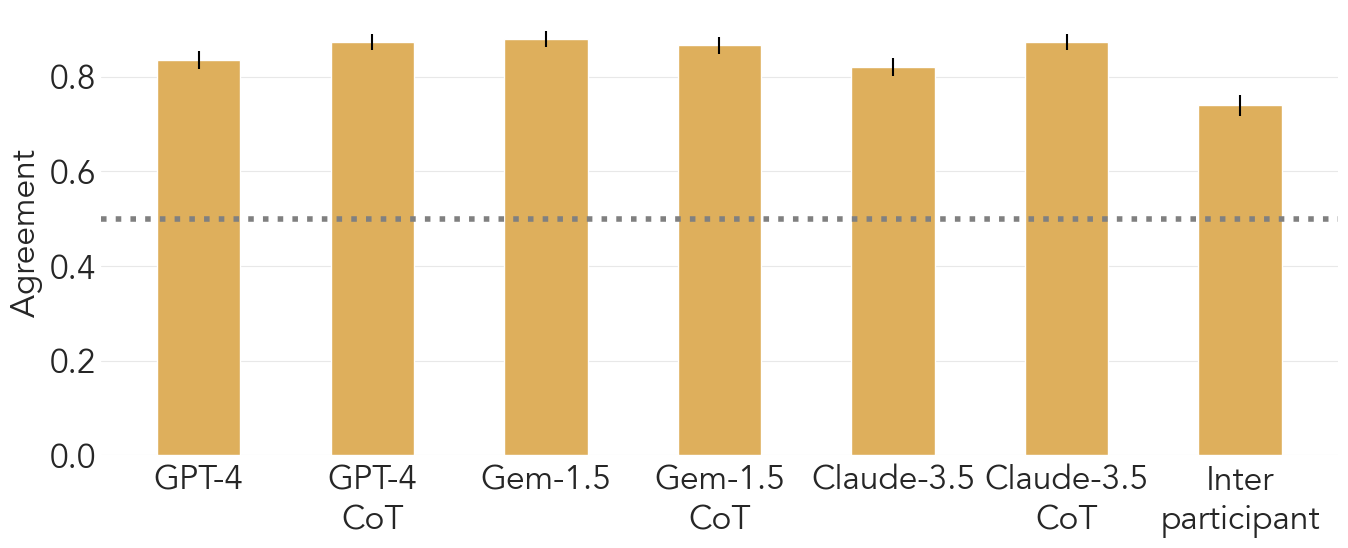

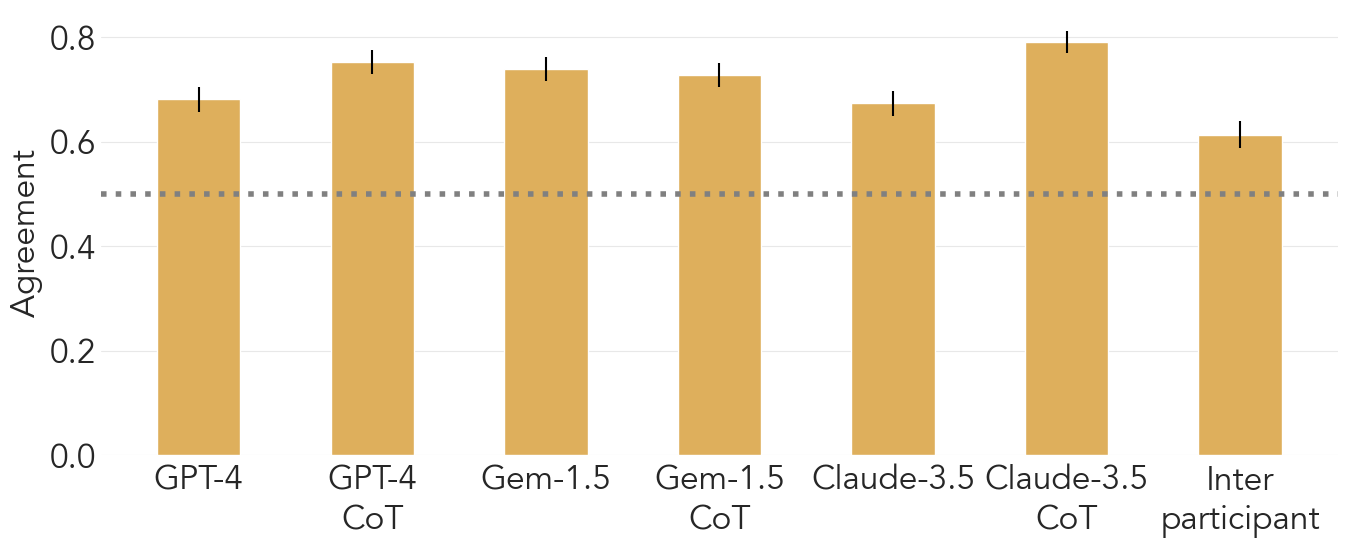

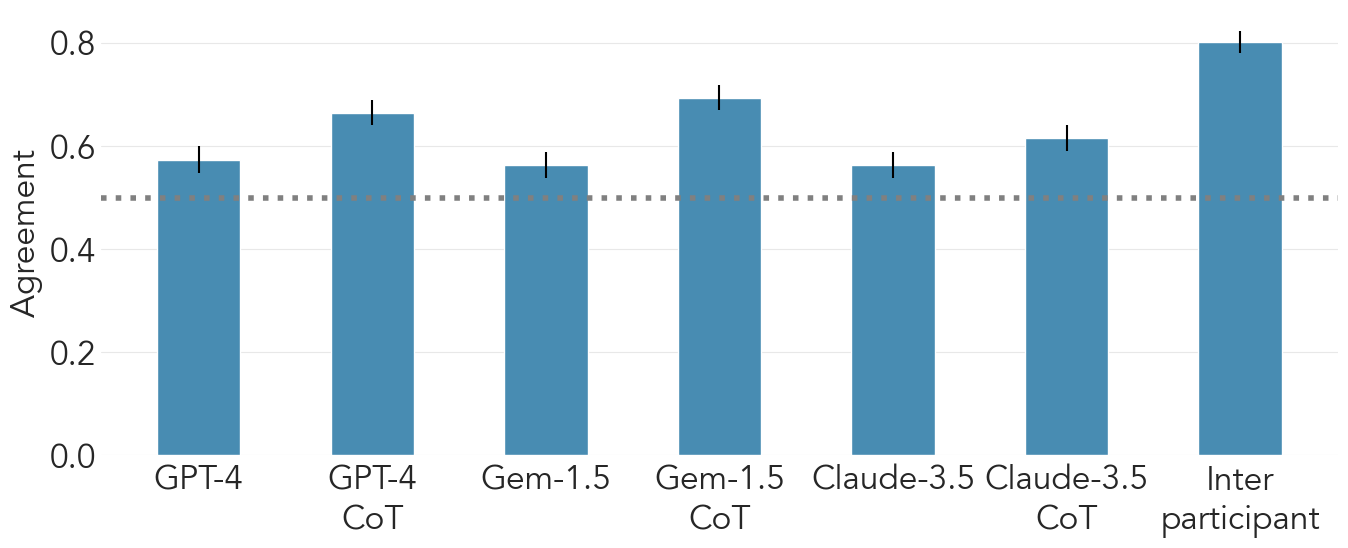

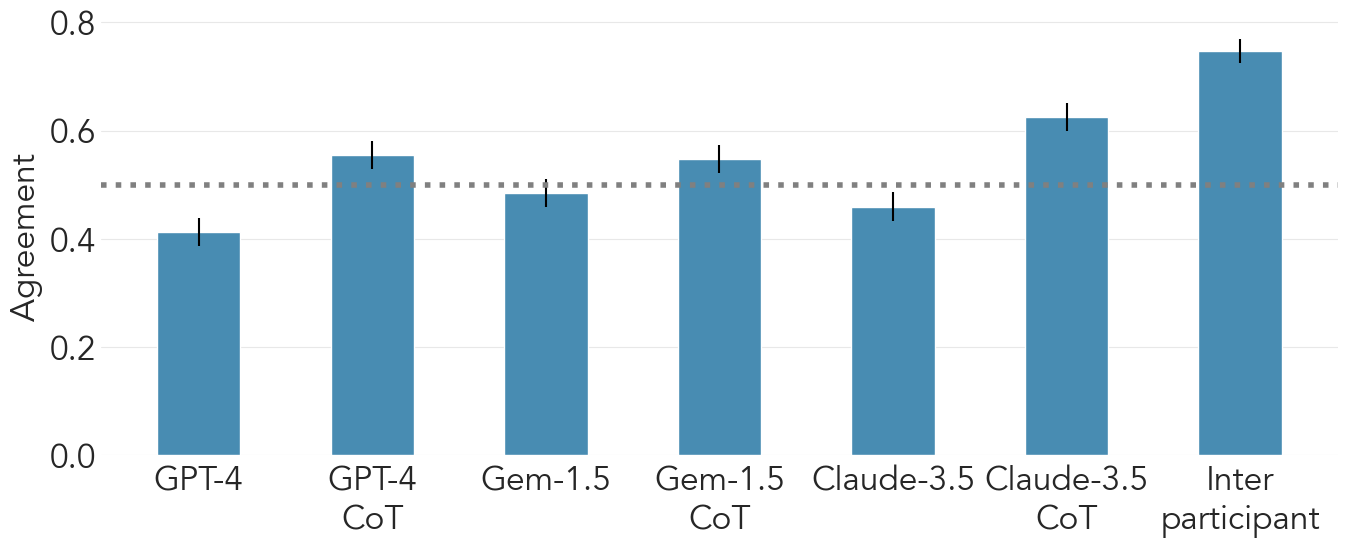

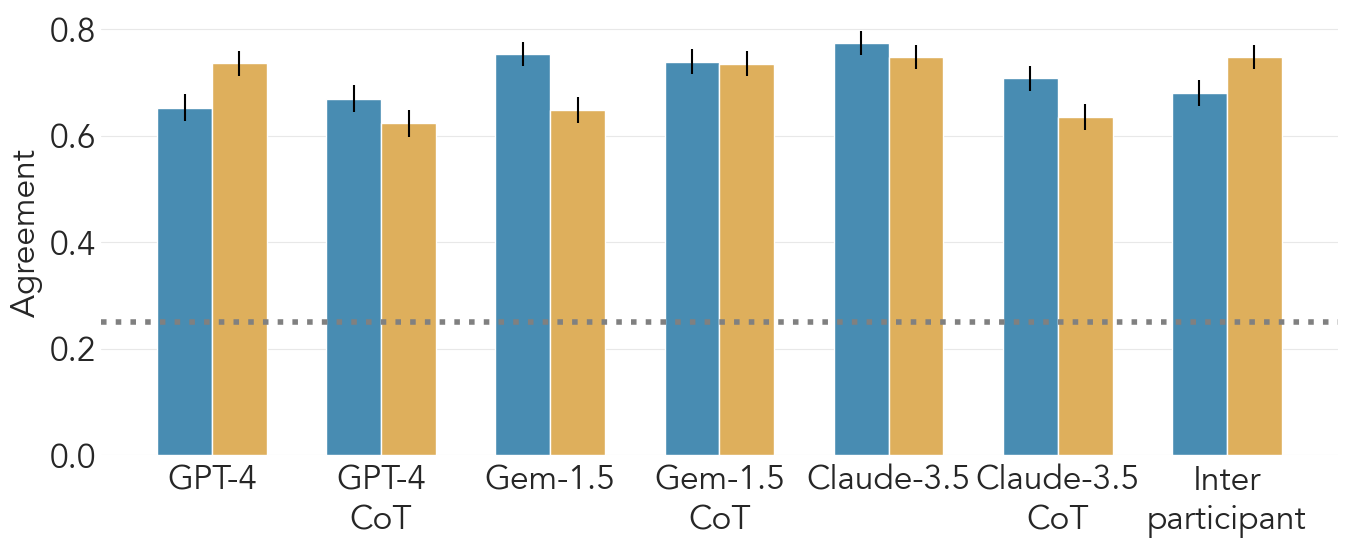

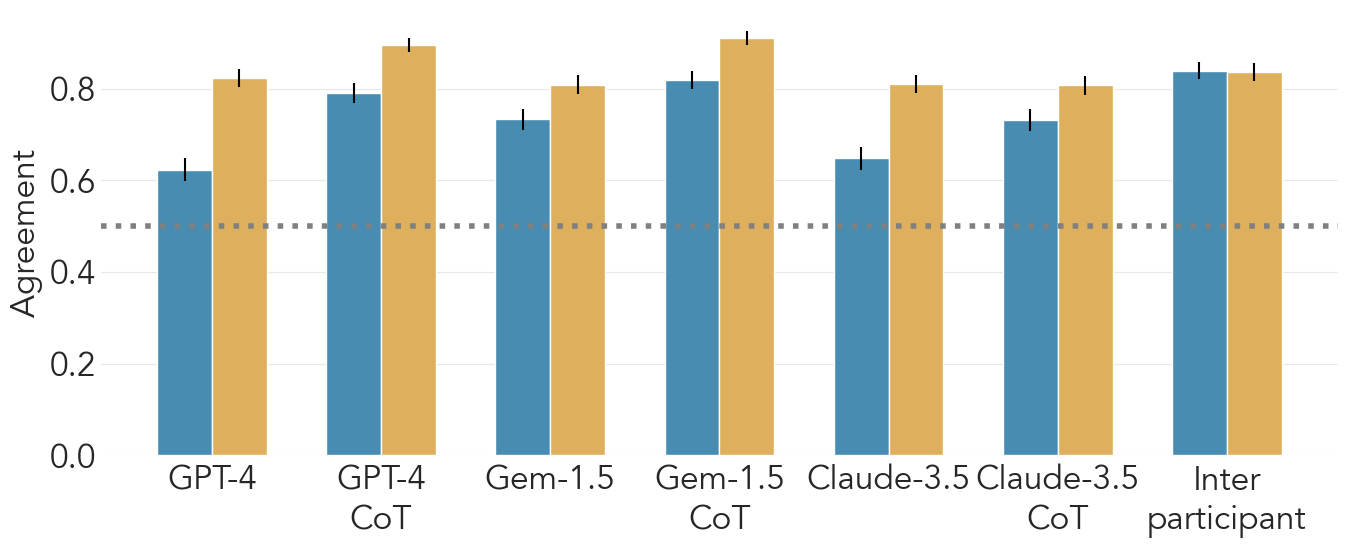

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


plt.rcParams["font.family"] = "Avenir"
plt.rcParams["font.size"] = 24

# keys are save_title, values are the keys in model_means and model_sems
plot_dict = {
    "x_control": ["control_inference"],
    "x_expected": ["expected_inference"],
    "x_goal": ["goal_inference"],
    "x_safety": ["safety_inference"],
    "x_emotion": ["emotion_inference_goal_control", "emotion_inference_safety_expected"],
    "x_outcome": ["outcome_inference_goal_control", "outcome_inference_safety_expected"]
}
# make all plots
for save_title in plot_dict.keys():
    keys = plot_dict[save_title]
    categories = keys



    labels = ["GPT-4", "GPT-4\nCoT",  "Gem-1.5", "Gem-1.5\nCoT", "Claude-3.5", "Claude-3.5\nCoT", "Inter\nparticipant"]



    # Initialize figure
    plt.figure(figsize=(14, 6))
    barWidth = 1.2
    gap = 1.3  # Increase this value to increase space between groups of bars



    # Determine the number of model methods for dynamic positioning
    model_methods = list(model_means.keys())  # Extract model methods from data
    model_methods = ["gpt-4_0shot", "gpt-4_0shot_cot", "gemini-1.5-pro-002_0shot", "gemini-1.5-pro-002_0shot_cot","claude-3-5-sonnet-20240620_0shot", "claude-3-5-sonnet-20240620_0shot_cot",  "interparticipant"]
    # model_methods = [k for k in model_methods if "partici" not in k]
    print(model_methods)
    num_model_methods = len(model_methods)
    num_categories = len(categories)

    # Calculate positions with increased gap
    positions = np.arange(num_model_methods) * (barWidth * num_categories + gap)

    # Adjust the positions for x-ticks to be at the center of each group of bars
    adjusted_positions = positions + (barWidth * (num_categories-1)) / 2

    # Color palette

    colorblind_palette = sns.color_palette('colorblind', n_colors=num_categories)
    if num_categories == 1:

        colorblind_palette = sns.color_palette('colorblind', n_colors=num_categories+1)
    if "col" in save_title:
        colorblind_palette = sns.color_palette('colorblind', n_colors=num_categories+4)
    print(len(colorblind_palette))
        
    colorblind_palette = [change_saturation(color, 0.6) for color in colorblind_palette]
    # Plot bars
    for i, key in enumerate(keys):
        means = [model_means[method][key] for method in model_methods if key in model_means[method]]
        sems = [model_sems[method][key] for method in model_methods if key in model_sems[method]]
        if (collapse == "goal" or collapse == "safety") and i == 1:
            j = 4
        elif (collapse == "control" or collapse == "expected") and i == 1:
            j = 1
        elif collapse == None and i == 0 and len(categories) == 1 and ("control" in keys[0] or "expected" in keys[0]):
            j = 1
        elif collapse == None and i == 1:
            j = 1
        elif collapse == None and i == 2:
            j=4
        elif collapse == None and i ==3:
            j=2
        else:
            j = i
        print(j,i)
        plt.bar(positions + i*barWidth, means, yerr=sems, width=barWidth, color=colorblind_palette[j])


    # draw a dotted line at chance level
    plt.axhline(y=model_means["chance"][keys[0]], color='grey', linestyle=':', linewidth=4)

    # Adjusting the plot
    plt.ylabel('Agreement')
    plt.xticks(adjusted_positions, labels, rotation=0)
    sns.despine(left=True, bottom=True)
    plt.grid(True, which='major', axis='y', linestyle='-', color='lightgrey', alpha=0.5)
    plt.tick_params(axis='y', length=0)
    plt.tight_layout()
    # plt.legend(loc='best', bbox_to_anchor=(0.5, -0.05), ncol=num_categories, fancybox=True, shadow=True)
    plt.yticks([0, 0.2, 0.4, 0.6, 0.8])
    # Show or save plot
    # plt.show()
    plt.savefig(save_title+".png", bbox_inches='tight')  # Uncomment to save the figure


In [18]:
# calculate mean of all interparticipant scores
all_interparticipant_scores = []
total_nums = 0
for condition_names in pp_agreement_scores:
    all_interparticipant_scores += pp_agreement_scores[condition_names]
    total_nums += len(pp_agreement_scores[condition_names])
print(total_nums)
print(np.mean(all_interparticipant_scores)*100)
print(np.std(np.array(all_interparticipant_scores)*100))

11320
75.07067137809187
43.260391082972475


In [20]:
claude_outcome_inference_mean = model_means["claude-3-5-sonnet-20240620_0shot_cot"]["outcome_inference_goal_control"]
claude_outcome_inference_ci = model_sems["claude-3-5-sonnet-20240620_0shot_cot"]["outcome_inference_goal_control"]
claude_outcome_inference_n = sum([condition_num_participants[condition] for condition in condition_num_participants if "goal_control/outcome" in condition])
print(claude_outcome_inference_mean, claude_outcome_inference_ci, claude_outcome_inference_n)


0.7314487632508834 0.02309273673236959 1415


In [21]:
from scipy import stats
import numpy as np
import math

def paired_ttest(a, b):
    t_statistic, p_value = stats.ttest_rel(a, b)
    return t_statistic, p_value

import math
from scipy import stats

def paired_ttest_from_stats(mean1, mean2, ci1, ci2, n):
    """
    Perform a paired t-test using summary statistics.
    
    Parameters:
    mean1, mean2 : float
        The means of the two conditions
    ci1, ci2 : float
        The 95% confidence intervals of the means (defined as 1.96 * std / sqrt(n))
    n : int
        The sample size (assumed to be the same for both conditions)
    
    Returns:
    t_statistic : float
        The calculated t-statistic
    p_value : float
        The two-tailed p-value
    """
    # Calculate the mean difference
    mean_diff = mean1 - mean2
    
    # Convert CIs to standard deviations
    std1 = (ci1 * math.sqrt(n)) / 1.96
    std2 = (ci2 * math.sqrt(n)) / 1.96
    
    # Calculate the standard deviation of the differences
    # For paired data, we need to account for the correlation between measures
    # As we don't have this information, we'll use a conservative estimate
    # assuming no correlation (which will give us a larger p-value)
    std_diff = math.sqrt(std1**2 + std2**2)
    
    # Calculate the standard error of the mean difference
    se_diff = std_diff / math.sqrt(n)
    
    # Calculate the t-statistic
    t_statistic = mean_diff / se_diff
    
    # Degrees of freedom
    df = n - 1
    
    # Calculate the p-value
    p_value = stats.t.sf(abs(t_statistic), df) * 2
    
    return t_statistic, p_value

def independent_ttest(a, b, equal_var=True):
    """
    Perform an independent samples t-test.
    
    Parameters:
    a, b : array-like
        The two groups of samples to be compared.
    equal_var : bool, optional
        If True (default), perform a standard independent 2 sample test that assumes equal population variances.
        If False, perform Welch's t-test, which does not assume equal population variance.
    
    Returns:
    t_statistic : float
        The calculated t-statistic
    p_value : float
        The two-tailed p-value
    """
    t_statistic, p_value = stats.ttest_ind(a, b, equal_var=equal_var)
    return t_statistic, p_value

def independent_ttest_from_stats(mean1, ci1, n1, mean2, ci2, n2):
    """
    Perform an independent samples t-test using summary statistics.
    
    Parameters:
    mean1, mean2 : float
        The means of the two groups
    ci1, ci2 : float
        The confidence intervals of the mean for the two groups (defined as 1.96 * std / sqrt(n))
    n1, n2 : int
        The sample sizes of the two groups
    
    Returns:
    t_statistic : float
        The calculated t-statistic
    p_value : float
        The two-tailed p-value
    """
    # Convert SEM to standard deviation
    std1 = (ci1 * math.sqrt(n1)) / 1.96
    std2 = (ci2 * math.sqrt(n2)) / 1.96
    
    # Calculate the standard error
    se1, se2 = std1**2/n1, std2**2/n2
    se = math.sqrt(se1 + se2)
    
    # Calculate the t-statistic
    t_statistic = (mean1 - mean2) / se
    
    # Calculate the degrees of freedom using the Welch–Satterthwaite equation
    df = (se1 + se2)**2 / (se1**2 / (n1-1) + se2**2 / (n2-1))
    
    # Calculate the p-value
    p_value = stats.t.sf(abs(t_statistic), df) * 2
    
    return t_statistic, p_value

def accuracy_vs_chance(mean_accuracy, num_responses, std_dev, chance_level):
    """
    Performs a one-sample t-test to compare mean accuracy to chance level.
    
    Parameters:
    mean_accuracy (float): The observed mean accuracy (between 0 and 1)
    num_responses (int): The number of responses (sample size)
    std_dev (float): The standard deviation of the accuracies
    chance_level (float): The chance level to compare against (default is 0.5)
    
    Returns:
    t_statistic : float
        The calculated t-statistic
    p_value : float
        The two-tailed p-value
    """
    
    # Calculate the t-statistic
    t_stat = (mean_accuracy - chance_level) / (std_dev / (num_responses ** 0.5))
    
    # Calculate the degrees of freedom
    df = num_responses - 1
    
    # Perform the t-test (two-tailed)
    p_value = stats.t.sf(abs(t_stat), df) * 2
    
    # Return the results
    return t_stat, p_value

In [24]:

# Test 7 Inter-Participants agreement vs gpt4 0-shot cot agreement for outcome inference in safety-expectedness condition
pp_outcome_inference_mean = model_means["interparticipant"]["outcome_inference_safety_expected"]
pp_outcome_inference_ci = model_sems["interparticipant"]["outcome_inference_safety_expected"]
pp_outcome_inference_n = sum([condition_num_participants[condition] for condition in condition_num_participants if "safety_expected/outcome" in condition])

gpt_outcome_inference_mean = model_means["gpt-4_0shot_cot"]["outcome_inference_safety_expected"]
gpt_outcome_inference_ci = model_sems["gpt-4_0shot_cot"]["outcome_inference_safety_expected"]
gpt_outcome_inference_n = sum([condition_num_participants[condition] for condition in condition_num_participants if "safety_expectedness/outcome" in condition])

t_statistic, p_value = paired_ttest_from_stats(pp_outcome_inference_mean,gpt_outcome_inference_mean, pp_outcome_inference_ci,gpt_outcome_inference_ci, pp_outcome_inference_n)
print("Test 7: Inter-Participants agreement vs gpt4 pro 0-shot cot agreement for outcome inference in safety-expectedness condition")
print("mean, 95%CI, n", pp_outcome_inference_mean, pp_outcome_inference_ci, pp_outcome_inference_n, pp_outcome_inference_mean-pp_outcome_inference_ci, pp_outcome_inference_mean+pp_outcome_inference_ci)
print("mean, 95%CI, n", gpt_outcome_inference_mean, gpt_outcome_inference_ci, gpt_outcome_inference_n, gpt_outcome_inference_mean-gpt_outcome_inference_ci, gpt_outcome_inference_mean+gpt_outcome_inference_ci)
print("t-statistic:", t_statistic)
print("p-value:", p_value)


Test 7: Inter-Participants agreement vs gpt4 pro 0-shot cot agreement for outcome inference in safety-expectedness condition
mean, 95%CI, n 0.835799859055673 0.01927537265868056 1419 0.8165244863969925 0.8550752317143535
mean, 95%CI, n 0.8957011980267794 0.015902966013480756 0 0.8797982320132987 0.9116041640402601
t-statistic: -4.698354068065173
p-value: 2.8771930100260683e-06
